In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/ir/dataset.csv

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
colNames = ["message", "messageHash", "messageClean", "length", "request", "request2","chatID", "channelName", "channelMembers", "fromID", "replyToID", "mediaHash","date", "flags"]
dataset = pd.read_csv("/content/drive/MyDrive/ir/dataset.csv", names=colNames,delimiter=',',header=None)
dataset.head(5)

,message,messageHash,messageClean,length,request,request2,chatID,channelName,channelMembers,fromID,replyToID,mediaHash,date,flags
0,تار طرب گسسته شد، ⏎ پای طلب شکسته شد ⏎ ⏎ راه ا...,18337fafa18c3c5e962526e4ac49a7a279c92cbf41c44d...,تار طرب گسسته ⏎ پای طلب شکسته ⏎ ⏎ راه امید بس...,221,negative,NaN,1101714024,انــیــمــ şђąß ġąяĐیــت,0,57975330,0,photo,2018-02-23T07:30:04.000Z,0
1,💢نامه رهبرمعظم انقلاب به احمدی‌نژاد ⏎ ⏎ ⏎ ادعا...,3c5efa52ad78794feda87516fcd01b6dc40b120fa831d5...,💢نامه رهبرمعظم انقلاب احمدی نژاد ⏎ ⏎ ⏎ ادعای غ...,206,negative,NaN,1058951347,🍃🌷بیــت الشـ❤ــهدا🌷🍃,0,373767048,0,photo,2018-02-23T07:29:40.000Z,0
2,پر از فیلم سکسی ⏎ گیف سکسی ⏎ کیرت شق کرده بیا ...,5a06451d666e1001920c0d0cb18c2cd15ed6233ad7da10...,پر فیلم سکسی ⏎ گیف سکسی ⏎ کیرت شق کرده توووو ⏎...,205,negative,NaN,1074131680,Jet Link 6,0,548787448,0,photo,2018-02-23T07:32:06.000Z,0
3,سلام ⏎ جمعه مبارک ⏎ جمعه تون مثل لبخند زیبا ⏎ ...,e6c24c24054c0d31f09ef10804be3f9ed6f7b7909b658b...,سلام ⏎ جمعه مبارک ⏎ جمعه تون مثل لبخند زیبا ⏎ ...,161,negative,NaN,1139514870,☕️🌿نيوشا راز ِسلامتي 🌿☕️,0,253117966,0,photo,2018-02-23T07:30:04.000Z,0
4,نرگس ار لاف زد از شیوه چشم تو مرنج ⏎ نروند اهل...,8f4536e7ab814b09a3ff4c994f630ce803d792a3378adf...,نرگس ار لاف زد شیوه چشم مرنج ⏎ نروند اهل نظر پ...,163,negative,NaN,1136838204,دلکده,0,166682910,0,photo,2018-02-23T07:29:15.000Z,0


In [ ]:
dataset.drop('messageHash', axis=1,inplace=True)
dataset.drop('messageClean', axis=1,inplace=True)
dataset.drop('length', axis=1,inplace=True)
dataset.drop('request2', axis=1,inplace=True)
dataset.drop('chatID', axis=1,inplace=True)
dataset.drop('channelName', axis=1,inplace=True)
dataset.drop('channelMembers', axis=1,inplace=True)
dataset.drop('fromID', axis=1,inplace=True)
dataset.drop('replyToID', axis=1,inplace=True)
dataset.drop('mediaHash', axis=1,inplace=True)
dataset.drop('date', axis=1,inplace=True)
dataset.drop('flags', axis=1,inplace=True)
dataset.head(2)

,message,request
0,تار طرب گسسته شد، ⏎ پای طلب شکسته شد ⏎ ⏎ راه ا...,negative
1,💢نامه رهبرمعظم انقلاب به احمدی‌نژاد ⏎ ⏎ ⏎ ادعا...,negative


In [ ]:
import re

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import GlobalMaxPool1D, MaxPooling1D, GlobalMaxPooling1D, Conv1D
from sklearn.metrics import classification_report, confusion_matrix

پیش پردازش

In [ ]:
#حذف لینک و منشن
def remove_link(row):
    row = str(row)
    cleantext = re.sub(r"(?:\@|https?\://)\S+", "", row)
    return cleantext.strip()

In [ ]:
dataset['message']=dataset['message'].apply(remove_link)

In [ ]:
def remove_hashtag(row):
    row = str(row)
    text = re.sub(r"#\w+", "", row)
    return text

In [ ]:
dataset['message']=dataset['message'].apply(remove_hashtag)

In [ ]:
def remove_enk(row):
    row = str(row)
    cleantext = re.sub(r"[/]|[A-Z]|[a-z]|[0-9]|[۰-۹]+", "", row)
    return cleantext

In [ ]:
dataset['message']=dataset['message'].apply(remove_enk)

In [ ]:
def remove(row):
    row = str(row)
    new = re.sub(r"[.():-;\'<>؛⇦◦◉|♝⚀▇╚₪₪╝#ՊՕխმՊՊმძ◠‿◠▆🔼║║╱☏★◥████◣∩│⌘↯$%&இੳஇइई┏┓♠☺☺➌♣╔╗▁▂▃▄▅▇▇▅▄▃▂▁+❢-\〰♂√™➯❅❅⛛♡✿×♀✾‌➖●●♦┄┅┅┄،!^+=:'" "@%$,«»◈◾♚※☑♥¨*♫♪⇛──═ঊঈঊঈ═──•⏎[\]]+", " ", row)#delete emoji
    return new.strip()

In [ ]:
dataset['message']=dataset['message'].apply(remove)

In [ ]:
def remove_emoji(row):
    row = str(row)
    new = re.sub(r"[.():-;\👙⛈⛅◘◘■ⓜⓐⓚⓐⓝⓑⓐⓝⓓ🕉🖍🛃🦍'ျ╄ြ₪🗃🖌🖍😺۩๑▬🦉🥞🦃🥨🗳Π∞🤭◔͜͡🗯🖋<>🤰🙉♌؛🕸⚛⇦🕑◦◉🚲🚊🥗🤮🚒🤧|♝🛶🛳🔢🙆⚀▇🖖♋🔠🗂╚₪₪╝😟#ՊՕխმՊՊმძ🤫◠‿◠▆↩🔼║║╱↖🔯⛪☏★😛☛🙆☜◥████◣∩│☠⌘🥒🥘↯$%&🤚☃🚧⏹🔩🔧🛂🤬😴🤵🥂😙♜இੳஇ🙅🤨┗━↗━┛😥🗒🧐🔲😽♍🧀🚶⚒🗡🤲🚖इई⌚┏┓🍑🚥🚂🚞🙇🚻🚍🖐🤝🛣🤡😮♠☸🗺🌵🕴☺☺🤪👋🕵😽➌♣💡🕺🚴🏵🤙🚷♓╔╗🗽🌰⛹🕌☕🚌🛠🕯✖🤕✴╭☃╮📎🦄🏡🌊▁▂▃▄▅▇▇▅▄▃▂▁🥝🍩╰☃╯🤐⬆👡+📹🤷💿👛👜🛡❢🗞🐟🐠📄⏪↪✒📰🤓♈🔳⛷-\🔛🏅🔓🖊😵〰🍒🤒🙋😧💬🚑⏱⛺🤦〽🔝🥔☕💪🥚🍄🥖🍄🥛🌽🍄🆑♂☕◀🕊😫🧡🐎🤼🤦🎧🌎☟⚕🕖🤦🤦🚔❓🈴🚀💶√™🙁🌧➯🍈😶🌞🔅🍹🔑💓🍢🤞🐤🤐🎩🎮🤢⛑💘🦁🔫🤑⏬☹🏁⚽🌙⛱💍👧😡🐧🔚❅❅🔖😣🔫😩🍇🤞💟😇🎛🍯📙🎄🎵🎶👫🔺🙀👅☀🍕🎤🕛🥁🤹🙌⚔🗼⛏😖⏸▓🥤😠🖕🖕😞🆕⚔⚕🚔☪⛛😓🍳😚🦅🍁🍎🌼😅⏬🍒😗👒😲👟☂🛒🏩♡🚹📖➖⬆🕗😯👎📪👒🍫👟🔖⛄⤴📊✿👠🎄🔎🏃‍♀🦋💳💲🥕📆🤤📥💉💊🏃🕳🥕🏥📦⏳✾‌🙃🔸🔓🌗➖🍅🌱🆚👋◼🏬🏢💒⚖🏛😌⚓🚩👋🍀🔸🚛🚕🕹🔸🌲🍮👿🖥📮😃🔮🚗🎈👊✊🎓🎂🐝🎞🔊😹🏽🅾💌🥉🛍🏻⚫📽⚽🏀🏈⚾🎾🥇👑😅🙊🏷⭐😼🥈👫👅🔆🌻😨📯🎨😀🚸📱🔶●⛓🌴🏆😇🤘☘🍁👦🧑👦🍷🙄💣🎭🏫✂📢😇🚘🔟📿☘👩👦🌾⭐●❣🌿☄🦂👥🌍🚺🤣🚚🌑🎋🚙🍂👻🕋🤗🚜🖼🎹👤➕😇📡🤖🎖🏻🔗🔰💧🎙↘⁉👚🌼♛📚🍊💻📲🌈⚙🤩♻⚡♦┄┅┅┄😉،!^+=:🌀🎵❣📅🎼🔹📩'" "✔🔷😷💟🗓📣📝@🔈🍏🔻📚🦇🎵🐺🔻%$☔💼⏰💸🚦💇🚪🗝🙂☯📌💀📳,🥀🌐➡🏕🏞👨👩🎶🗨🦋😕🏿«»✳Ⓜ👁⛔◈🔘◾🐴🎬😪👌♚❇😏💔👯🔜⬇※☑💎🛫♥✨👗👖🎉🎊🍌💵😱¨*♫♪📛🍆⇛♨✌⬛🔱🏴🎀🔪🤠💜💙🖤💗💛💝🎥🚬🎯☞──═ঊঈঊঈ═──😔•❗🛑▶🤠✅☎🤔↙❥😐🤔💄💞👉🎗👸😘💅😰💥💃😆🖇😈📍😋⭕🏾📷💕❌💯💖😻💚📞❄👍🕰🗣😊✈🚆📺🏼🚨🍟🍿🌳😳😒😝😁💋😄🙈🆔📸⚠🐳💐⚪️✍🌟🍃💫🔞🌷😑✋😎😬🎁⬅💠🌹👏😜👇😂🌸⚜🔴❤🙏😢👈☝😭👀🔵🌺💰🚫🔥😦😍👆💢💦⏎[\]]+", "", row)#delete emoji
    return new.strip()

In [ ]:
dataset['message']=dataset['message'].apply(remove_emoji)

In [ ]:
dataset['flag']=[1 if (x=="positive") else 0 for x in dataset['request']]
dataset

,message,request,flag
0,تار طرب گسسته شد پای طلب شکسته شد راه ا...,negative,0
1,نامه رهبرمعظم انقلاب به احمدی نژاد ادعای...,negative,0
2,پر از فیلم سکسی گیف سکسی کیرت شق کرده بیا ...,negative,0
3,سلام جمعه مبارک جمعه تون مثل لبخند زیبا ...,negative,0
4,نرگس ار لاف زد از شیوه چشم تو مرنج نروند اهل...,negative,0
...,...,...,...
85736,نوشته شعر فقط بهانه است من با صدای بلند به شم...,negative,0
85737,سیستمت اگه باشه هم میشه,negative,0
85738,سلام دوتا سوال از سینتیک و طراحی راکتور دارم ک...,positive,1
85739,یه مرکز خیریه هست به اسم موسسه رضوان ادرس موسس...,negative,0


In [ ]:
dataset = dataset.dropna(how='any',axis=0)

In [ ]:
training_data = dataset
training_data = pd.DataFrame(training_data, columns=['message', 'flag'])
print(training_data.message.shape)

(77635,)


مدل اول

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
# importing TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=300,ngram_range=(1,3))
X=tfidf.fit_transform(training_data.message).toarray()

In [ ]:
# spliting the dataset in train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,training_data.flag,test_size=0.2,random_state=42)

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

مدل دوم

In [ ]:
# first defind dictionory size
vec_size=20
# defined sentence length
sen_length=300
# define the feature size i.e diamention
dim=40

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,training_data.flag,test_size=0.2,random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset.flag, test_size=0.20)

In [ ]:
EMBEDDING_LEN = 300

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fa.zip
! unzip wiki.fa.zip
! rm -rf wiki.fa.zip
! rm -rf wiki.fa.vec

--2023-02-27 10:44:13--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fa.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3631863356 (3.4G) [application/zip]
Saving to: ‘wiki.fa.zip’

wiki.fa.zip         100%[===================>]   3.38G  49.5MB/s    in 72s     

2023-02-27 10:45:25 (48.2 MB/s) - ‘wiki.fa.zip’ saved [3631863356/3631863356]

Archive:  wiki.fa.zip
  inflating: wiki.fa.vec             
  inflating: wiki.fa.bin             


In [ ]:

! pip install fasttext

! pip install gdown


! pip install matplotlib==3.1.3

! pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=4400551 sha256=4a0c3a1d5755161af5a11b8afcd572ab3734dfc6fb03fb118bcc9afa73f4c1d5
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully unin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394485 sha256=0f711b0b0348c28370f846c3f1995641391d98dd108563ffbae82aa877b86248
  Stored in directory: /root/.cache/pip/wheels/19/1d/3a/0a8c14c30132b4f9ffd796efbb6746f15b3d6bcfc1055a9346
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp38-cp38-linux_x86_64.whl size=180701 sha256=a6cf3e9a9251ffb1a73e218b5b4f24d9a42d08a6d9721ce54ec183048e5383b8
  Stored in directory: /root/.cache/pip/wheels/3c/d8/9f/59fd78b2b7d1e9ffcb68fb6de80c2e7c20b804c8cbc4d8fc23
Successfully built nltk libwapiti
  Attempting unin

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
import fasttext

from hazm import word_tokenize, Normalizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import re
import numpy as np

In [ ]:
# Model 1:
#
model_skipgram = fasttext.load_model('wiki.fa.bin')

In [ ]:

comments = X_train['message'].values
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=3000)
tokenizer.fit_on_texts(comments)

vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size : {}'.format(vocab_size))

Vocabulary Size : 55143


In [ ]:
encoded_comments = tokenizer.texts_to_sequences(comments)

print("Comment : {}".format(comments[1]))
print("Corresponding Encoding : {}".format(encoded_comments[1]))

Comment : الهام جوین شدی؟
Corresponding Encoding : [1994]


In [ ]:
# padding
SENT_MAX_LEN = max([len(sent) for sent in encoded_comments])
padded_sequence = pad_sequences(encoded_comments, maxlen=SENT_MAX_LEN, padding='post')
print('Padding Shape: {}'.format(padded_sequence.shape))

Padding Shape: (62108, 243)


In [ ]:
# initial embedding matrix
embedding_matrix = np.zeros((vocab_size, EMBEDDING_LEN))

for word, i in tokenizer.word_index.items():
  embedding_vector = model_skipgram.get_word_vector(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

print(f"Embedding Matrix Shape is: {embedding_matrix.shape}")

Embedding Matrix Shape is: (55143, 300)


In [ ]:

eval_comments = X_test['message'].values
tokenizer.texts_to_matrix(eval_comments)
eval_encoded_comments = tokenizer.texts_to_sequences(eval_comments)
eval_padded_sequence = pad_sequences(eval_encoded_comments, maxlen=SENT_MAX_LEN, padding='post')

In [ ]:

test_comments = X_test['message'].values
tokenizer.texts_to_matrix(test_comments)
test_encoded_comments = tokenizer.texts_to_sequences(test_comments)
test_padded_sequence = pad_sequences(test_encoded_comments, maxlen=SENT_MAX_LEN, padding='post')

In [ ]:
from keras.layers import concatenate
from tensorflow.keras.layers import concatenate

استخراج ویژگی مدل اول

In [ ]:
# initialize the model
model_1=Sequential()
model_1.add(Embedding(vec_size,dim,input_length=sen_length))
model_1.add(Conv1D(filters=40, kernel_size=4, activation='relu'))
model_1.add(GlobalMaxPooling1D())
#model_1.add(Dense(32, activation='relu'))
#model_1.add(Dense(1))

model1 = Model(model_1.input, model_1.output)
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop')

استخراج ویژگی مدل دوم

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(vocab_size, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False))
model_2.add(Conv1D(filters=40, kernel_size=4, activation='relu'))
model_2.add(GlobalMaxPooling1D())
#model_2.add(Dense(32, activation='relu'))
#model_2.add(Dense(1)) add(LSTM(32, activation='relu'))

model2 = Model(model_2.input, model_2.output)
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model2.fit(padded_sequence,y_train,validation_data=(eval_padded_sequence, y_test),epochs=5,batch_size=256) Adagard

ادغام دو مدل

تنظیم پارامتر ها را هم اورده شده است

In [ ]:
combined = concatenate([model1.output, model2.output])
finalmodel = Dense(40, activation = 'relu')(combined)
finalmodel = Dropout(0.2)(finalmodel)
finalmodel = Dense(1, activation = 'relu')(finalmodel)
finalmodel = Model(inputs=[model1.input, model2.input], outputs=finalmodel)
finalmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=15, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

Epoch 1/15
486/486 [==============================] - 183s 370ms/step - loss: 0.5304 - accuracy: 0.8184 - val_loss: 0.4012 - val_accuracy: 0.8654
Epoch 2/15
486/486 [==============================] - 171s 352ms/step - loss: 0.4256 - accuracy: 0.8697 - val_loss: 0.3743 - val_accuracy: 0.8770
Epoch 3/15
486/486 [==============================] - 189s 389ms/step - loss: 0.4253 - accuracy: 0.8785 - val_loss: 0.4114 - val_accuracy: 0.8856
Epoch 4/15
486/486 [==============================] - 172s 354ms/step - loss: 0.4234 - accuracy: 0.8844 - val_loss: 0.3740 - val_accuracy: 0.8588
Epoch 5/15
486/486 [==============================] - 174s 358ms/step - loss: 0.4195 - accuracy: 0.8894 - val_loss: 0.5028 - val_accuracy: 0.8927
Epoch 6/15
486/486 [==============================] - 164s 338ms/step - loss: 0.3942 - accuracy: 0.8979 - val_loss: 0.5193 - val_accuracy: 0.8903
Epoch 7/15
486/486 [==============================] - 190s 391ms/step - loss: 0.4016 - accuracy: 0.8997 - val_loss: 0.5405 -

KeyboardInterrupt: ignored

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(vocab_size, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False))
model_2.add(Conv1D(filters=40, kernel_size=1, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(BatchNormalization())
model2 = Model(model_2.input, model_2.output)
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model2.fit(padded_sequence,y_train,validation_data=(eval_padded_sequence, y_test),epochs=5,batch_size=256) Adagard

In [ ]:
combined = concatenate([model1.output, model2.output])
finalmodel = Dense(40, activation = 'relu')(combined)
finalmodel = BatchNormalization()(finalmodel)
finalmodel = Dropout(0.2)(finalmodel)
finalmodel = Dense(1, activation = 'relu')(finalmodel)
finalmodel = Model(inputs=[model1.input, model2.input], outputs=finalmodel)
finalmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=15, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

Epoch 1/15
486/486 [==============================] - 86s 173ms/step - loss: 2.1039 - accuracy: 0.7904 - val_loss: 1.6669 - val_accuracy: 0.8354
Epoch 2/15
486/486 [==============================] - 87s 179ms/step - loss: 1.3621 - accuracy: 0.8462 - val_loss: 1.0544 - val_accuracy: 0.8679
Epoch 3/15
486/486 [==============================] - 97s 199ms/step - loss: 0.9722 - accuracy: 0.8584 - val_loss: 0.7239 - val_accuracy: 0.8700
Epoch 4/15
486/486 [==============================] - 88s 181ms/step - loss: 0.5730 - accuracy: 0.8566 - val_loss: 0.4805 - val_accuracy: 0.8792
Epoch 5/15
486/486 [==============================] - 79s 162ms/step - loss: 0.4798 - accuracy: 0.8766 - val_loss: 0.4010 - val_accuracy: 0.8892
Epoch 6/15
486/486 [==============================] - 85s 175ms/step - loss: 0.4069 - accuracy: 0.8852 - val_loss: 0.3945 - val_accuracy: 0.8943
Epoch 7/15
486/486 [==============================] - 86s 178ms/step - loss: 0.3924 - accuracy: 0.8921 - val_loss: 0.3916 - val_ac

In [ ]:
from sklearn.metrics import classification_report

y_pred = finalmodel.predict((xtest, eval_padded_sequence))
#print(classification_report(y_test, y_pred))
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


486/486 [==============================] - 5s 11ms/step


In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred[i]=0
  if y_pred[i]>=0.5:
    y_pred[i]=1

In [ ]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='macro'))
print('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

Accuracy Score: 0.8999806788175436
Precision Score: 0.9006374752755173
Recall Score: 0.8997306131329923
F1 Score: 0.8998842023080196


In [ ]:
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=1, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

486/486 [==============================] - 92s 189ms/step - loss: 0.3142 - accuracy: 0.9099 - val_loss: 0.3994 - val_accuracy: 0.8919


In [ ]:
# initialize the model
model_1=Sequential()
model_1.add(Conv1D(filters=40, kernel_size=1, activation='relu'))
model_1.add(GlobalMaxPooling1D())
model_2.add(BatchNormalization())
#model_1.add(Dense(32, activation='relu'))
#model_1.add(Dense(1))

#model1 = Model(model_1.input, model_1.output)
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(vocab_size, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False))
model_2.add(Conv1D(filters=40, kernel_size=1, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(BatchNormalization())
model2 = Model(model_2.input, model_2.output)
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model2.fit(padded_sequence,y_train,validation_data=(eval_padded_sequence, y_test),epochs=5,batch_size=256) Adagard

In [ ]:
combined = concatenate([model1.output, model2.output])
finalmodel = Dense(25, activation = 'relu')(combined)
finalmodel = BatchNormalization()(finalmodel)
finalmodel = Dropout(0.2)(finalmodel)
finalmodel = Dense(1)(finalmodel)
finalmodel = Model(inputs=[model1.input, model2.input], outputs=finalmodel)
finalmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=15, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

Epoch 1/15
486/486 [==============================] - 84s 170ms/step - loss: 1.5585 - accuracy: 0.8353 - val_loss: 0.9304 - val_accuracy: 0.8939
Epoch 2/15
486/486 [==============================] - 81s 167ms/step - loss: 0.8685 - accuracy: 0.8956 - val_loss: 0.9656 - val_accuracy: 0.8901
Epoch 3/15
486/486 [==============================] - 86s 177ms/step - loss: 0.7006 - accuracy: 0.8966 - val_loss: 0.6346 - val_accuracy: 0.8952
Epoch 4/15
486/486 [==============================] - 81s 167ms/step - loss: 0.4812 - accuracy: 0.8980 - val_loss: 0.4969 - val_accuracy: 0.8835
Epoch 5/15
486/486 [==============================] - 87s 178ms/step - loss: 0.3652 - accuracy: 0.9029 - val_loss: 0.4323 - val_accuracy: 0.8962
Epoch 6/15
486/486 [==============================] - 86s 177ms/step - loss: 0.3219 - accuracy: 0.9073 - val_loss: 0.4341 - val_accuracy: 0.8953
Epoch 7/15
486/486 [==============================] - 81s 167ms/step - loss: 0.3018 - accuracy: 0.9098 - val_loss: 0.3821 - val_ac

In [ ]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='macro'))
print('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

Accuracy Score: 0.89978746699298
Precision Score: 0.9005363745135513
Recall Score: 0.899520032779512
F1 Score: 0.8996821886811004


In [ ]:
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=1, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

486/486 [==============================] - 84s 173ms/step - loss: 0.2792 - accuracy: 0.9193 - val_loss: 0.4325 - val_accuracy: 0.9000


In [ ]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='macro'))
print('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

Accuracy Score: 0.8999806788175436
Precision Score: 0.9017062227041854
Recall Score: 0.8995721053681031
F1 Score: 0.8997918589482237


In [ ]:
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=1, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

486/486 [==============================] - 85s 174ms/step - loss: 0.2708 - accuracy: 0.9194 - val_loss: 0.4273 - val_accuracy: 0.8968


In [ ]:
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=1, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

486/486 [==============================] - 83s 171ms/step - loss: 0.2750 - accuracy: 0.9200 - val_loss: 0.4175 - val_accuracy: 0.8963


In [ ]:
combined = concatenate([model1.output, model2.output])
finalmodel = Dense(25)(combined)
finalmodel = BatchNormalization()(finalmodel)
finalmodel = Dropout(0.2)(finalmodel)
finalmodel = Dense(1, activation = 'relu')(finalmodel)
finalmodel = Model(inputs=[model1.input, model2.input], outputs=finalmodel)
finalmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=8, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

Epoch 1/8
486/486 [==============================] - 85s 171ms/step - loss: 1.0471 - accuracy: 0.8796 - val_loss: 0.9936 - val_accuracy: 0.8966
Epoch 2/8
486/486 [==============================] - 83s 172ms/step - loss: 0.7659 - accuracy: 0.9051 - val_loss: 0.8772 - val_accuracy: 0.8928
Epoch 3/8
486/486 [==============================] - 83s 170ms/step - loss: 0.6915 - accuracy: 0.9089 - val_loss: 0.9670 - val_accuracy: 0.8875
Epoch 4/8
486/486 [==============================] - 88s 180ms/step - loss: 0.6222 - accuracy: 0.9092 - val_loss: 0.7022 - val_accuracy: 0.8983
Epoch 5/8
486/486 [==============================] - 88s 182ms/step - loss: 0.4777 - accuracy: 0.9112 - val_loss: 0.5650 - val_accuracy: 0.8967
Epoch 6/8
486/486 [==============================] - 93s 192ms/step - loss: 0.3703 - accuracy: 0.9150 - val_loss: 0.5061 - val_accuracy: 0.8990
Epoch 7/8
486/486 [==============================] - 91s 187ms/step - loss: 0.3250 - accuracy: 0.9184 - val_loss: 0.4243 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

y_pred = finalmodel.predict((xtest, eval_padded_sequence))
#print(classification_report(y_test, y_pred))
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred[i]=0
  if y_pred[i]>=0.5:
    y_pred[i]=1


In [ ]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='macro'))
print('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

Accuracy Score: 0.901526373414053
Precision Score: 0.9015010020119882
Recall Score: 0.9015456946423579
F1 Score: 0.9015164322357314


In [ ]:
combined = concatenate([model1.output, model2.output])
finalmodel = Dense(25)(combined)
finalmodel = BatchNormalization()(finalmodel)
finalmodel = Dropout(0.2)(finalmodel)
finalmodel = Dense(1, activation = 'sigmoid')(finalmodel)
finalmodel = Model(inputs=[model1.input, model2.input], outputs=finalmodel)
finalmodel.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=1, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

486/486 [==============================] - 126s 251ms/step - loss: 0.4199 - accuracy: 0.8196 - val_loss: 0.3710 - val_accuracy: 0.8436


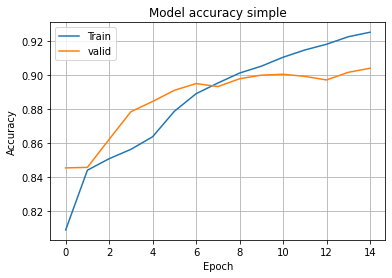

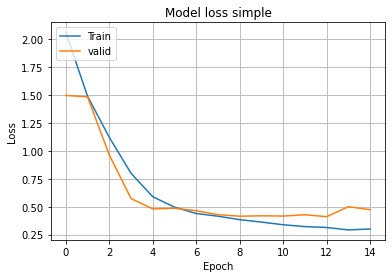

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()


486/486 [==============================] - 6s 12ms/step


In [ ]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='macro'))
print('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

Accuracy Score: 0.9024924325368713
Precision Score: 0.902874286347874
Recall Score: 0.9022944138409092
F1 Score: 0.9024220526309323


In [ ]:
xtrain.shape

(62108, 300)

In [ ]:
# initialize the model
model_1=Sequential()
model_1.add(Embedding(vec_size,dim,input_length=sen_length))
model_1.add(Conv1D(filters=40, kernel_size=4, activation='relu'))
model_1.add(GlobalMaxPooling1D())
model_1.add(BatchNormalization())
model_1.add(Dense(20, activation = 'relu'))
model_1.add(Dense(1, activation = 'relu'))

model1 = Model(model_1.input, model_1.output)
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model1.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10,batch_size=128)

Epoch 1/10
486/486 [==============================] - 26s 52ms/step - loss: 6.0117e-08 - accuracy: 0.4570 - val_loss: 6.0676e-08 - val_accuracy: 0.4910
Epoch 2/10
486/486 [==============================] - 25s 52ms/step - loss: 6.0117e-08 - accuracy: 0.4570 - val_loss: 6.0676e-08 - val_accuracy: 0.4533
Epoch 3/10
418/486 [========================>.....] - ETA: 3s - loss: 6.0186e-08 - accuracy: 0.4560

KeyboardInterrupt: ignored

In [ ]:
from keras.utils import plot_model

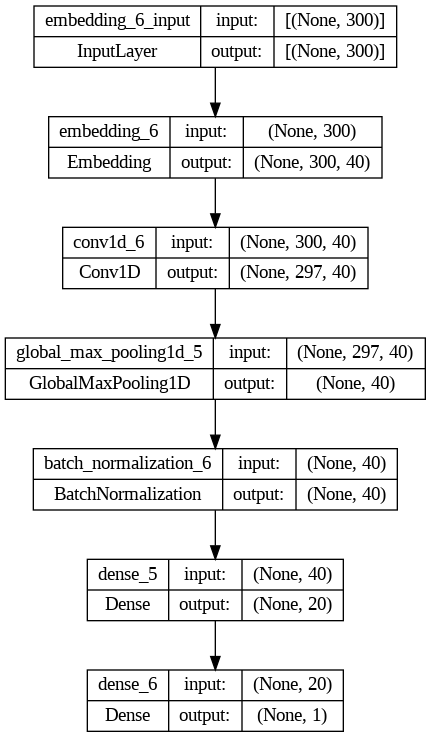

In [ ]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#xtrain,xtest,ytrain,ytest=train_test_split(X,training_data.flag,test_size=0.2,random_state=42)

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(vocab_size, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False))
model_2.add(Conv1D(filters=40, kernel_size=4, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(BatchNormalization())
model2 = Model(model_2.input, model_2.output)
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model2.fit(padded_sequence,y_train,validation_data=(eval_padded_sequence, y_test),epochs=5,batch_size=256) Adagard

NameError: ignored

In [ ]:
combined = concatenate([model1.output, model2.output])
finalmodel = Dense(40, activation = 'relu')(combined)
finalmodel = BatchNormalization()(finalmodel)
finalmodel = Dropout(0.2)(finalmodel)
finalmodel = Dense(1, activation = 'relu')(finalmodel)
finalmodel = Model(inputs=[model1.input, model2.input], outputs=finalmodel)
finalmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=15, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

Epoch 1/15
486/486 [==============================] - 140s 284ms/step - loss: 2.0625 - accuracy: 0.8087 - val_loss: 1.4966 - val_accuracy: 0.8453
Epoch 2/15
486/486 [==============================] - 144s 297ms/step - loss: 1.4892 - accuracy: 0.8439 - val_loss: 1.4837 - val_accuracy: 0.8456
Epoch 3/15
486/486 [==============================] - 132s 271ms/step - loss: 1.1214 - accuracy: 0.8507 - val_loss: 0.9636 - val_accuracy: 0.8622
Epoch 4/15
486/486 [==============================] - 133s 274ms/step - loss: 0.7993 - accuracy: 0.8563 - val_loss: 0.5729 - val_accuracy: 0.8785
Epoch 5/15
486/486 [==============================] - 131s 270ms/step - loss: 0.5890 - accuracy: 0.8637 - val_loss: 0.4799 - val_accuracy: 0.8845
Epoch 6/15
486/486 [==============================] - 134s 275ms/step - loss: 0.4959 - accuracy: 0.8787 - val_loss: 0.4860 - val_accuracy: 0.8911
Epoch 7/15
486/486 [==============================] - 131s 270ms/step - loss: 0.4389 - accuracy: 0.8891 - val_loss: 0.4638 -

In [ ]:
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=5, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

Epoch 1/5
486/486 [==============================] - 133s 274ms/step - loss: 0.2886 - accuracy: 0.9291 - val_loss: 0.5269 - val_accuracy: 0.9037
Epoch 2/5
486/486 [==============================] - 131s 270ms/step - loss: 0.2735 - accuracy: 0.9315 - val_loss: 0.5247 - val_accuracy: 0.8986
Epoch 3/5
486/486 [==============================] - 134s 276ms/step - loss: 0.2778 - accuracy: 0.9338 - val_loss: 0.5122 - val_accuracy: 0.9044
Epoch 4/5
486/486 [==============================] - 137s 282ms/step - loss: 0.2688 - accuracy: 0.9379 - val_loss: 0.5533 - val_accuracy: 0.9037
Epoch 5/5
486/486 [==============================] - 140s 289ms/step - loss: 0.2822 - accuracy: 0.9390 - val_loss: 0.6516 - val_accuracy: 0.9029


In [ ]:
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=5, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

Epoch 1/5
486/486 [==============================] - 140s 288ms/step - loss: 0.2627 - accuracy: 0.9403 - val_loss: 0.7174 - val_accuracy: 0.9031
Epoch 2/5
486/486 [==============================] - 134s 275ms/step - loss: 0.2759 - accuracy: 0.9413 - val_loss: 0.6747 - val_accuracy: 0.9015
Epoch 3/5
486/486 [==============================] - 134s 276ms/step - loss: 0.2629 - accuracy: 0.9433 - val_loss: 0.6835 - val_accuracy: 0.8997
Epoch 4/5
486/486 [==============================] - 132s 272ms/step - loss: 0.2591 - accuracy: 0.9464 - val_loss: 0.6783 - val_accuracy: 0.9006
Epoch 5/5
486/486 [==============================] - 134s 276ms/step - loss: 0.2684 - accuracy: 0.9473 - val_loss: 0.6331 - val_accuracy: 0.9061


In [ ]:
from sklearn.metrics import classification_report

y_pred = finalmodel.predict((xtest, eval_padded_sequence))
#print(classification_report(y_test, y_pred))
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


486/486 [==============================] - 13s 27ms/step


In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]<=0.5:
    y_pred[i]=0
  if y_pred[i]>0.5:
    y_pred[i]=1


In [ ]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='macro'))
print('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

Accuracy Score: 0.9060990532620596
Precision Score: 0.9061500285115862
Recall Score: 0.9060230767448778
F1 Score: 0.9060691586691063


In [ ]:
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=5, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

Epoch 1/5
486/486 [==============================] - 127s 261ms/step - loss: 0.2381 - accuracy: 0.9574 - val_loss: 0.9493 - val_accuracy: 0.9024
Epoch 2/5
486/486 [==============================] - 132s 271ms/step - loss: 0.2538 - accuracy: 0.9577 - val_loss: 0.7510 - val_accuracy: 0.9032
Epoch 3/5
486/486 [==============================] - 134s 276ms/step - loss: 0.2485 - accuracy: 0.9580 - val_loss: 0.7787 - val_accuracy: 0.9031
Epoch 4/5
486/486 [==============================] - 131s 270ms/step - loss: 0.2426 - accuracy: 0.9605 - val_loss: 0.9104 - val_accuracy: 0.9039
Epoch 5/5
486/486 [==============================] - 134s 276ms/step - loss: 0.2485 - accuracy: 0.9588 - val_loss: 0.8241 - val_accuracy: 0.9019


In [ ]:
history = finalmodel.fit((xtrain, padded_sequence), y_train, epochs=5, validation_data=((xtest, eval_padded_sequence), y_test),batch_size=128)

Epoch 1/5
486/486 [==============================] - 128s 263ms/step - loss: 0.2433 - accuracy: 0.9614 - val_loss: 0.9002 - val_accuracy: 0.8928
Epoch 2/5
486/486 [==============================] - 128s 264ms/step - loss: 0.2364 - accuracy: 0.9615 - val_loss: 0.9007 - val_accuracy: 0.8987
Epoch 3/5
486/486 [==============================] - 125s 258ms/step - loss: 0.2350 - accuracy: 0.9617 - val_loss: 0.9572 - val_accuracy: 0.9038
Epoch 4/5
486/486 [==============================] - 125s 258ms/step - loss: 0.2295 - accuracy: 0.9647 - val_loss: 0.8068 - val_accuracy: 0.9000
Epoch 5/5
486/486 [==============================] - 126s 259ms/step - loss: 0.2365 - accuracy: 0.9651 - val_loss: 0.8903 - val_accuracy: 0.9028


معماری روش

In [ ]:
from keras.utils import plot_model

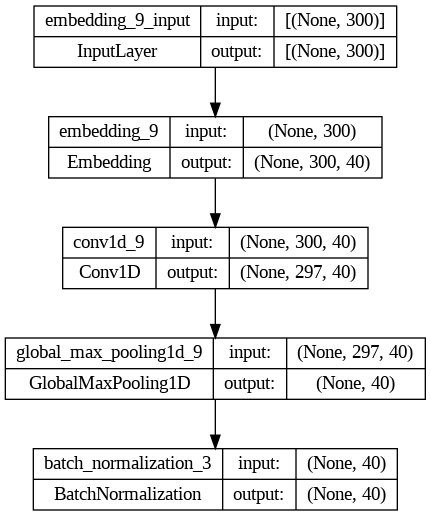

In [ ]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

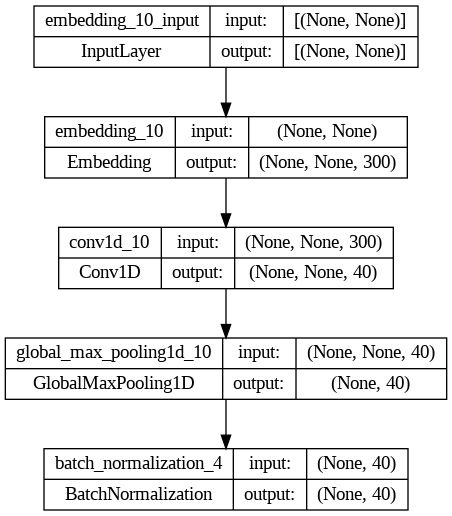

In [ ]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

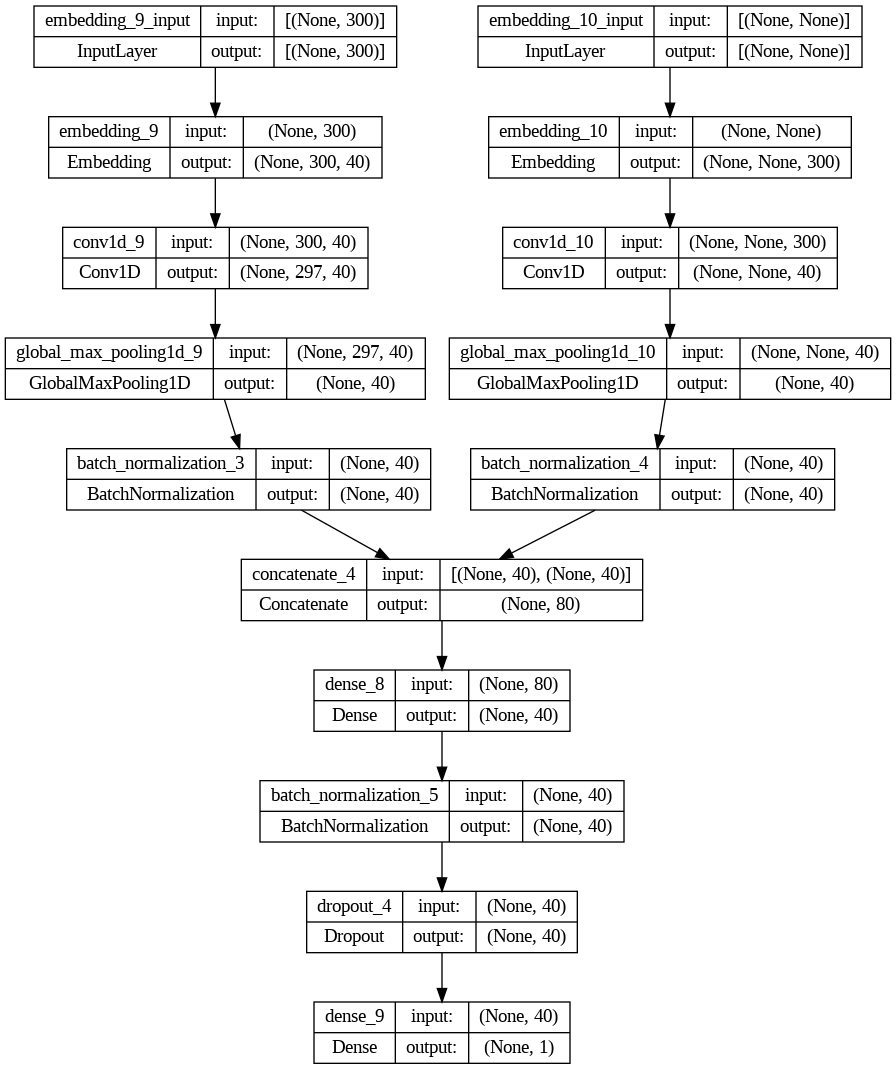

In [ ]:
plot_model(finalmodel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ارزیابی

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.message)
#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, training_data.flag, test_size=0.2)
clf = MultinomialNB().fit(X_train, y_train)
#SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
category_list = ["negative","positive"]
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
#loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

In [ ]:
predicted = loaded_model.predict(X_test)
result_bayes = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_bayes.to_csv('res_bayes.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

Streaming output truncated to the last 5000 lines.
negative  -  negative
positive  -  positive
negative  -  positive
positive  -  positive
negative  -  negative
negative  -  positive
positive  -  negative
negative  -  negative
negative  -  negative
negative  -  negative
negative  -  negative
negative  -  negative
negative  -  negative
positive  -  positive
negative  -  negative
positive  -  positive
positive  -  positive
positive  -  positive
positive  -  positive
negative  -  negative
positive  -  positive
positive  -  positive
negative  -  positive
negative  -  positive
negative  -  negative
negative  -  positive
positive  -  positive
negative  -  negative
negative  -  negative
positive  -  positive
negative  -  negative
positive  -  positive
positive  -  positive
positive  -  positive
positive  -  positive
negative  -  positive
positive  -  positive
negative  -  positive
positive  -  positive
positive  -  positive
positive  -  positive
negative  -  negative
positive  -  positive
neg

In [ ]:

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Accuracy Score:', accuracy_score(y_test,predicted))
print('Precision Score:', precision_score(y_test, predicted, average='macro'))
print('Recall Score:', recall_score(y_test, predicted, average='macro'))
print('F1 Score:', f1_score(y_test, predicted, average='macro'))

Accuracy Score: 0.7568751207573904
Precision Score: 0.7570997111633629
Recall Score: 0.7570478999285546
F1 Score: 0.7568727972667779


In [ ]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, training_data.flag, test_size=0.15)
    clf = MultinomialNB(alpha=i).fit(X_train, y_train)
    #SAVE MODEL
    pickle.dump(clf, open("nb_model.pkl", "wb"))


    category_list = ["negative","positive"]
    loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
    #loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
    loaded_model = pickle.load(open("nb_model.pkl","rb"))


    predicted = loaded_model.predict(X_test)
    result_bayes = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
    result_bayes.to_csv('res_bayes.csv', sep = ',')

    #for predicted_item, result in zip(predicted, y_test):
        #print(category_list[predicted_item], ' - ', category_list[result])



    print(" alpha: =========" , i)

    print('Accuracy Score:', accuracy_score(y_test,predicted))
    print('Precision Score:', precision_score(y_test, predicted, average='macro'))
    print('Recall Score:', recall_score(y_test, predicted, average='macro'))
    print('F1 Score:', f1_score(y_test, predicted, average='macro'))

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


 alpha: ========= 0
Accuracy Score: 0.7579426412502147
Precision Score: 0.7581070849854206
Recall Score: 0.7581917334733332
F1 Score: 0.7579368426277523
 alpha: ========= 1
Accuracy Score: 0.7610338313584063
Precision Score: 0.7612654531120431
Recall Score: 0.7611833123008442
F1 Score: 0.7610281067871709
 alpha: ========= 2
Accuracy Score: 0.7587154387772626
Precision Score: 0.759076692818734
Recall Score: 0.758857602965932
F1 Score: 0.7586862881188943
 alpha: ========= 3
Accuracy Score: 0.7630087583719732
Precision Score: 0.7632671840128746
Recall Score: 0.7632255884049752
F1 Score: 0.7630075771606941
 alpha: ========= 4
Accuracy Score: 0.756482912588013
Precision Score: 0.7567561059958147
Recall Score: 0.7566603174393421
F1 Score: 0.7564760106420128
 alpha: ========= 5
Accuracy Score: 0.7597458354799931
Precision Score: 0.7600545289367064
Recall Score: 0.7599146810227659
F1 Score: 0.7597327334696338
 alpha: ========= 6
Accuracy Score: 0.7546797183582346
Precision Score: 0.75501219669

In [ ]:
for i in range(10):
    kk=i/10
    X_train, X_test, y_train, y_test = train_test_split(X, training_data.flag, test_size=0.15)
    clf = MultinomialNB(alpha=kk).fit(X_train, y_train)
    #SAVE MODEL
    pickle.dump(clf, open("nb_model.pkl", "wb"))


    category_list = ["negative","positive"]
    loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
    #loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
    loaded_model = pickle.load(open("nb_model.pkl","rb"))


    predicted = loaded_model.predict(X_test)
    result_bayes = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
    result_bayes.to_csv('res_bayes.csv', sep = ',')

    #for predicted_item, result in zip(predicted, y_test):
        #print(category_list[predicted_item], ' - ', category_list[result])



    print(" alpha: =========" , kk)

    print('Accuracy Score:', accuracy_score(y_test,predicted))
    print('Precision Score:', precision_score(y_test, predicted, average='macro'))
    print('Recall Score:', recall_score(y_test, predicted, average='macro'))
    print('F1 Score:', f1_score(y_test, predicted, average='macro'))

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


 alpha: ========= 0.0
Accuracy Score: 0.7601751674394642
Precision Score: 0.761117879042583
Recall Score: 0.7606457576642691
F1 Score: 0.7601258429234672
 alpha: ========= 0.1
Accuracy Score: 0.7580285076421088
Precision Score: 0.7584863514997648
Recall Score: 0.7584189927873306
F1 Score: 0.7580266807459317
 alpha: ========= 0.2
Accuracy Score: 0.7677314099261549
Precision Score: 0.7679212823418123
Recall Score: 0.7678221042734095
F1 Score: 0.7677212559217388
 alpha: ========= 0.3
Accuracy Score: 0.7553666494933883
Precision Score: 0.7558641856795443
Recall Score: 0.7557965480075235
F1 Score: 0.7553649161342406
 alpha: ========= 0.4
Accuracy Score: 0.7577709084664263
Precision Score: 0.7580284852705127
Recall Score: 0.7579451831145197
F1 Score: 0.7577655058044757
 alpha: ========= 0.5
Accuracy Score: 0.7537351880473983
Precision Score: 0.75398813319164
Recall Score: 0.7537538251372566
F1 Score: 0.7536827025663403
 alpha: ========= 0.6
Accuracy Score: 0.7622359608449253
Precision Score:

In [ ]:
from sklearn import svm
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X, training_data.flag, test_size=0.15)
clf_svm.fit(X, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
category_list = ["negative","positive"]
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
#loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm.pkl","rb"))

In [ ]:
predicted = clf_svm.predict(X_test)
result_svm = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')
for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

Streaming output truncated to the last 5000 lines.
positive  -  positive
positive  -  positive
positive  -  positive
negative  -  negative
positive  -  positive
negative  -  negative
positive  -  positive
negative  -  negative
positive  -  negative
positive  -  positive
positive  -  positive
positive  -  positive
negative  -  negative
positive  -  positive
positive  -  positive
negative  -  negative
positive  -  positive
positive  -  positive
positive  -  negative
positive  -  negative
positive  -  positive
positive  -  positive
negative  -  positive
negative  -  negative
positive  -  positive
positive  -  positive
positive  -  positive
negative  -  negative
positive  -  positive
negative  -  negative
positive  -  positive
positive  -  positive
positive  -  positive
positive  -  positive
negative  -  negative
negative  -  negative
positive  -  positive
positive  -  positive
negative  -  negative
positive  -  positive
positive  -  positive
negative  -  negative
negative  -  positive
neg

In [ ]:
#ماشین بردار پشتیبان
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Accuracy Score:', accuracy_score(y_test,predicted))
print('Precision Score:', precision_score(y_test, predicted, average='macro'))
print('Recall Score:', recall_score(y_test, predicted, average='macro'))
print('F1 Score:', f1_score(y_test, predicted, average='macro'))

Accuracy Score: 0.876781727631805
Precision Score: 0.8769209233223746
Recall Score: 0.8768051695789202
F1 Score: 0.8767745310391476


In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='sigmoid')
X_train, X_test, y_train, y_test = train_test_split(X, training_data.flag, test_size=0.15)
clf_svm.fit(X, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

#clf = svm.SVC(kernel='linear', C=1, random_state=42)

import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
category_list = ["negative","positive"]
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
#loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm.pkl","rb"))

predicted = clf_svm.predict(X_test)
result_svm = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')

#ماشین بردار پشتیبان
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Accuracy Score:', accuracy_score(y_test,predicted))
print('Precision Score:', precision_score(y_test, predicted, average='macro'))
print('Recall Score:', recall_score(y_test, predicted, average='macro'))
print('F1 Score:', f1_score(y_test, predicted, average='macro'))

Accuracy Score: 0.7839601579941611
Precision Score: 0.7839206846533748
Recall Score: 0.7838627930463158
F1 Score: 0.7838858154870245


In [ ]:
#svm.LinearSVR
from sklearn import svm
clf_svm = svm.NuSVC()
X_train, X_test, y_train, y_test = train_test_split(X, training_data.flag, test_size=0.15)
clf_svm.fit(X, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

#clf = svm.SVC(kernel='linear', C=1, random_state=42)

import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
category_list = ["negative","positive"]
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
#loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm.pkl","rb"))

predicted = clf_svm.predict(X_test)
result_svm = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')

#ماشین بردار پشتیبان
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Accuracy Score:', accuracy_score(y_test,predicted))
print('Precision Score:', precision_score(y_test, predicted, average='macro'))
print('Recall Score:', recall_score(y_test, predicted, average='macro'))
print('F1 Score:', f1_score(y_test, predicted, average='macro'))

Accuracy Score: 0.8609823115232698
Precision Score: 0.861294676203334
Recall Score: 0.8611768627219634
F1 Score: 0.8609792108817602


In [ ]:
#svm.LinearSVR
from sklearn import svm
clf_svm = svm.NuSVC(kernel='sigmoid')
X_train, X_test, y_train, y_test = train_test_split(X, training_data.flag, test_size=0.20)
clf_svm.fit(X, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

#clf = svm.SVC(kernel='linear', C=1, random_state=42)

import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
category_list = ["negative","positive"]
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
#loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm.pkl","rb"))

predicted = clf_svm.predict(X_test)
result_svm = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')

#ماشین بردار پشتیبان
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Accuracy Score:', accuracy_score(y_test,predicted))
print('Precision Score:', precision_score(y_test, predicted, average='macro'))
print('Recall Score:', recall_score(y_test, predicted, average='macro'))
print('F1 Score:', f1_score(y_test, predicted, average='macro'))

Accuracy Score: 0.8450441166999421
Precision Score: 0.8453614449750764
Recall Score: 0.8451917853638534
F1 Score: 0.8450359091628595
